In [1]:
import preprocess
import compare
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 5)

## Preprocessing

* read csv file with several db dumps
* split data into laps
* save 1 csv per lap
* interpolate and aggregate each feature at each segment of the lap (100 segments)
* save 1 csv per lap


In [2]:
# split data into laps
# this will write 1 csv file per lap in ../data/extracted
path = "../data/raw/89db51de-22a6-4033-8201-2fc37a5fe905.csv"
preprocess.extract_laps_from_session_csv(path)

# read extracted data and transform the data (time indexed -> space indexed)
for inpath in pathlib.Path().glob("../data/extracted/*lap*.csv"):
    outpath = f"../data/preprocessed/{inpath.name}"
    preprocess.preprocess_lap(inpath, outpath)

/home/goern/Source/github.com/b4mad/racing/ai/analysis/src/preprocess.py:61: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df = df.pivot("_time", "_field", "_value")


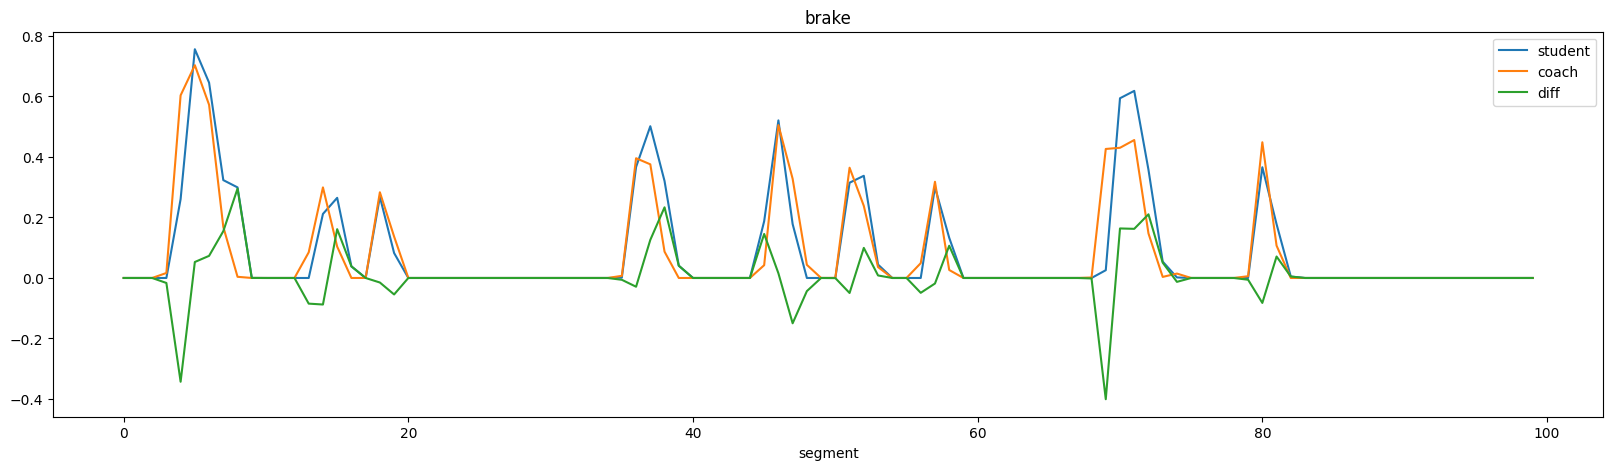

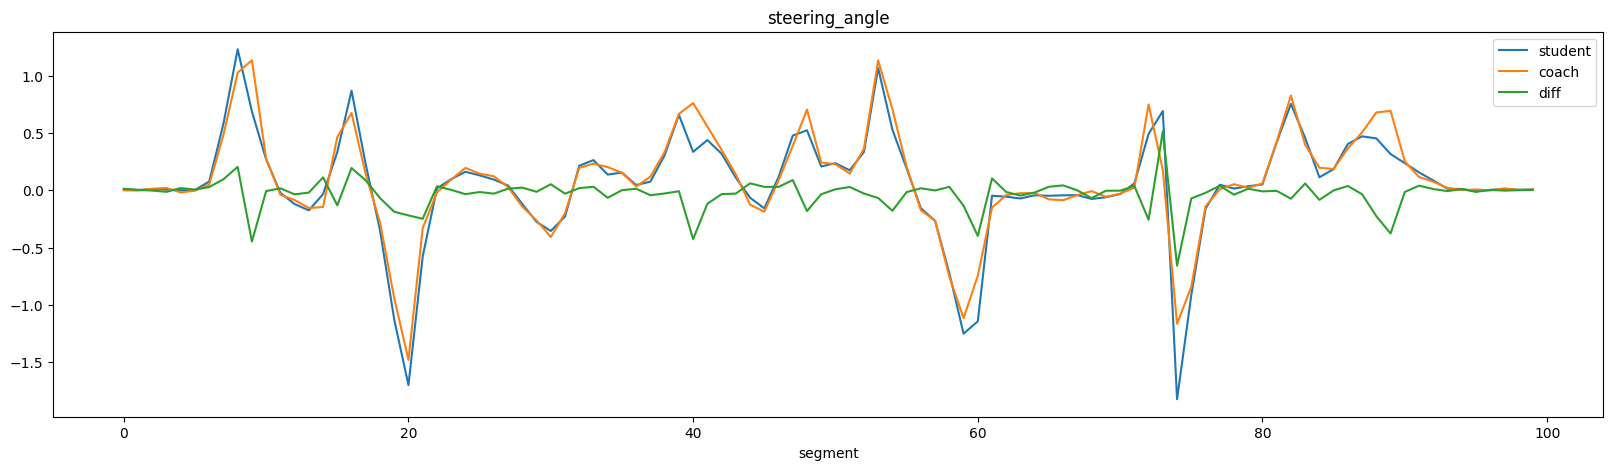

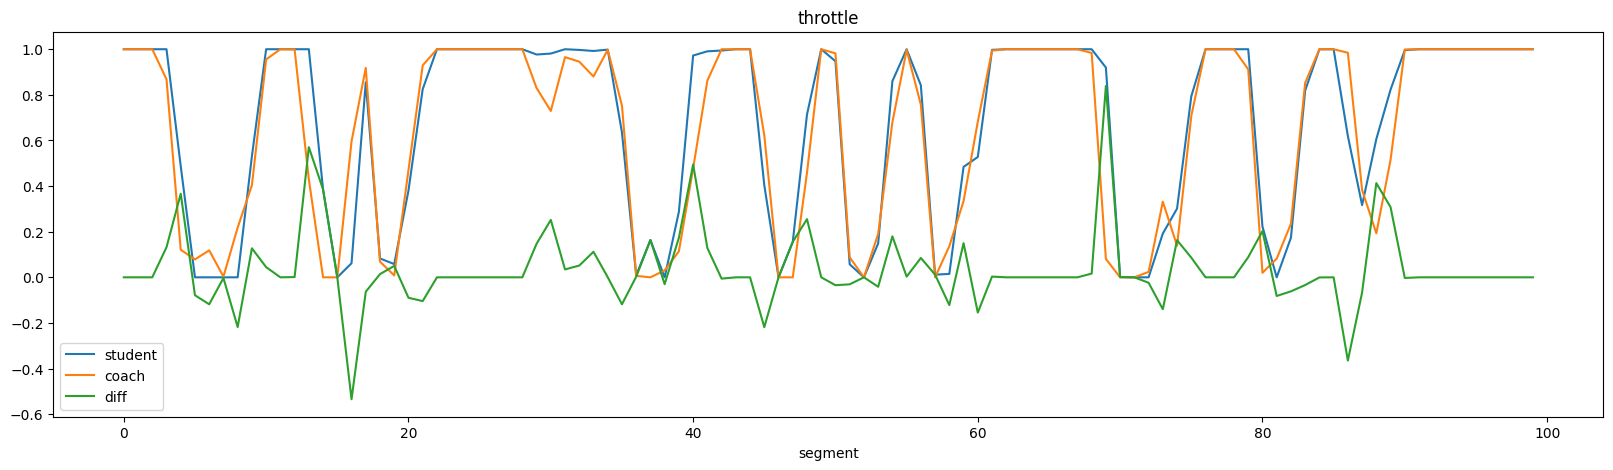

In [3]:
# lets have a look
student_csv = "../data/preprocessed/89db51de-22a6-4033-8201-2fc37a5fe905-lap18.csv"
coach_csv = "../data/preprocessed/89db51de-22a6-4033-8201-2fc37a5fe905-lap16.csv"

student = pd.read_csv(student_csv).set_index("segment")
coach = pd.read_csv(coach_csv).set_index("segment")

# normalize features and compute difference between student and coach
coach = compare.normalize(coach)
student = compare.normalize(student)
diff = student - coach

for c in student.columns:
    student[c].plot()
    coach[c].plot()
    diff[c].plot()
    plt.legend(["student", "coach", "diff"])
    plt.title(c)
    plt.show()

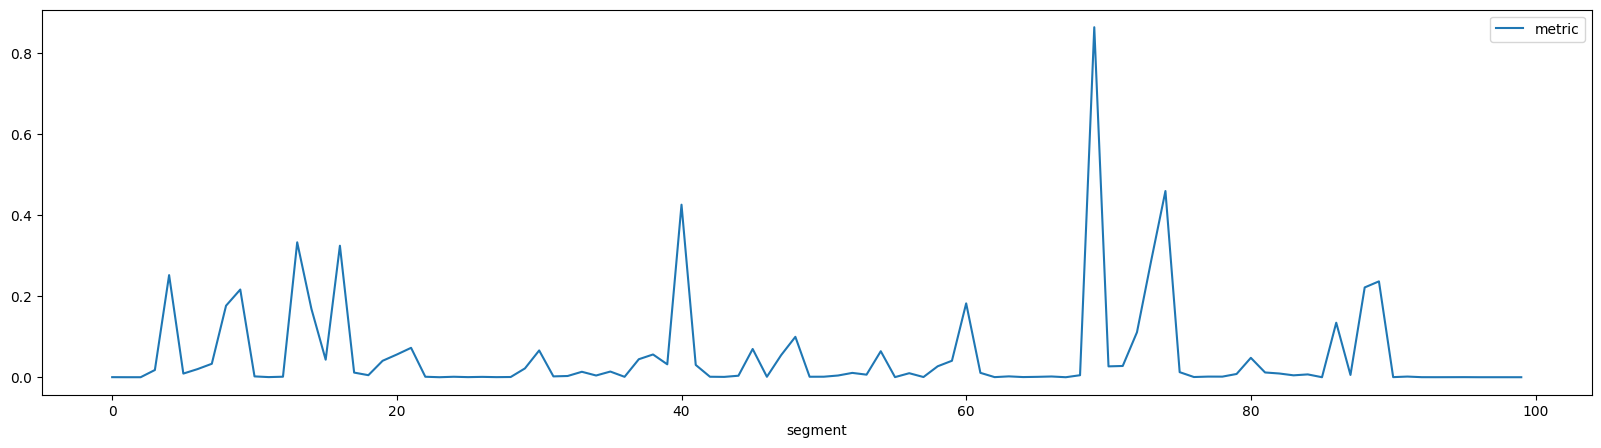

                         suggestion
segment                            
0        steering_angle is too high
1        steering_angle is too high
2         steering_angle is too low
3              throttle is too high
4              throttle is too high
...                             ...
95        steering_angle is too low
96       steering_angle is too high
97        steering_angle is too low
98       steering_angle is too high
99       steering_angle is too high

[100 rows x 1 columns]


In [4]:
# compute 'worst' segments / where student can improve the most
metrics = compare.compute_metric(coach, student)

# and suggetions for each segment
suggestions = compare.compute_suggestions(coach, student)
metrics.plot()
plt.show()
print(suggestions)

In [5]:
# get the 10 most important suggestions for this lap
ranked_suggestions = compare.analyse_csv(coach_csv, student_csv, 10)
print(*ranked_suggestions)

{'segment': 69, 'metric': 0.8646161472129343, 'suggestion': 'throttle is too high'} {'segment': 74, 'metric': 0.4599349189974955, 'suggestion': 'steering_angle is too low'} {'segment': 40, 'metric': 0.4262080401222319, 'suggestion': 'throttle is too high'} {'segment': 13, 'metric': 0.333248050361203, 'suggestion': 'throttle is too high'} {'segment': 16, 'metric': 0.324855665396535, 'suggestion': 'throttle is too low'} {'segment': 73, 'metric': 0.28811170799876223, 'suggestion': 'steering_angle is too high'} {'segment': 4, 'metric': 0.2522120123254722, 'suggestion': 'throttle is too high'} {'segment': 89, 'metric': 0.23681065042186297, 'suggestion': 'steering_angle is too low'} {'segment': 88, 'metric': 0.22180909438680932, 'suggestion': 'throttle is too high'} {'segment': 9, 'metric': 0.2166438511903409, 'suggestion': 'steering_angle is too low'}


In [6]:
for suggestion in ranked_suggestions:
    print(
        f"in segment {suggestion['segment']} : {suggestion['suggestion']} \t ({suggestion['metric']})"
    )

in segment 69 : throttle is too high 	 (0.8646161472129343)
in segment 74 : steering_angle is too low 	 (0.4599349189974955)
in segment 40 : throttle is too high 	 (0.4262080401222319)
in segment 13 : throttle is too high 	 (0.333248050361203)
in segment 16 : throttle is too low 	 (0.324855665396535)
in segment 73 : steering_angle is too high 	 (0.28811170799876223)
in segment 4 : throttle is too high 	 (0.2522120123254722)
in segment 89 : steering_angle is too low 	 (0.23681065042186297)
in segment 88 : throttle is too high 	 (0.22180909438680932)
in segment 9 : steering_angle is too low 	 (0.2166438511903409)
